=== POS Frequency ===
NOUN   : 69791
PUNCT  : 44620
VERB   : 39320
ADV    : 14428
ADJ    : 13966
DET    : 12058
ADP    : 11540
PROPN  : 11249
CCONJ  : 10629
PRON   :  8136
AUX    :  7157
SCONJ  :  5756
PART   :  5351
NUM    :  3355
X      :   936
SYM    :   433
INTJ   :   117

=== Dependency Relation Frequency ===
punct           : 44618
nmod            : 28210
nsubj           : 19786
obl             : 16229
root            : 15058
conj            : 14751
amod            : 13916
advmod          : 12566
case            : 11722
obj             : 11018
cc              : 10624
iobj            :  6198
det             :  6032
mark            :  5591
advcl           :  4843
ccomp           :  4430
acl             :  4285
xcomp           :  3940
cop             :  3818
discourse       :  3545
nummod          :  2408
flat:name       :  2206
nsubj:pass      :  2001
advmod:emph     :  1851
aux             :  1689
aux:pass        :  1606
parataxis       :  1004
fixed           :   951
csubj       

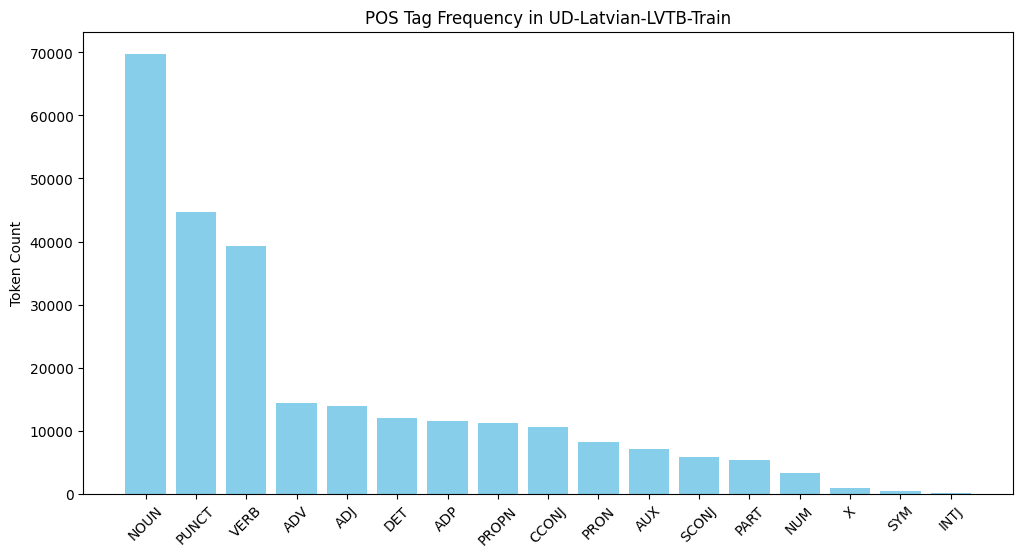

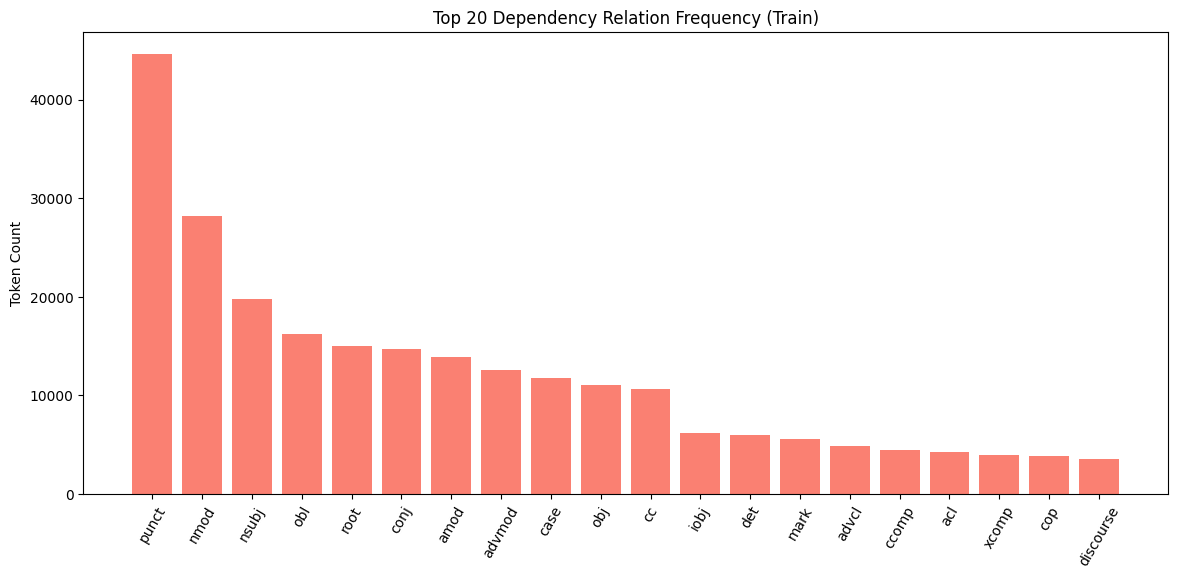

In [4]:
from conllu import parse_incr
from collections import Counter
import matplotlib.pyplot as plt

# 初始化计数器
pos_counter = Counter()
rel_counter = Counter()

# 读取训练数据
with open("./UD_Latvian_LVTB/lv_lvtb-ud-train.conllu", "r", encoding="utf-8") as f:
    for tokenlist in parse_incr(f):
        for token in tokenlist:
            pos_counter[token["upos"]] += 1
            rel_counter[token["deprel"]] += 1

# 美观输出 POS
print("=== POS Frequency ===")
for pos, count in pos_counter.most_common():
    print(f"{pos:6} : {count:5}")

# 美观输出 Dependency
print("\n=== Dependency Relation Frequency ===")
for rel, count in rel_counter.most_common():
    print(f"{rel:15} : {count:5}")

# 可视化 POS
plt.figure(figsize=(12,6))
pos_labels, pos_values = zip(*pos_counter.most_common())
plt.bar(pos_labels, pos_values, color='skyblue')
plt.title("POS Tag Frequency in UD-Latvian-LVTB-Train")
plt.ylabel("Token Count")
plt.xticks(rotation=45)
plt.show()

# 可视化 Dependency Relation（只展示前 20 高频）
plt.figure(figsize=(14,6))
top_rel = rel_counter.most_common(20)
rel_labels, rel_values = zip(*top_rel)
plt.bar(rel_labels, rel_values, color='salmon')
plt.title("Top 20 Dependency Relation Frequency (Train)")
plt.ylabel("Token Count")
plt.xticks(rotation=60)
plt.show()


### Analysis of the UD-Latvian LVTB dataset shows a noticeable class imbalance. 

POS tags such as NOUN, VERB, and PUNCT dominate the dataset, while rare tags such as INTJ, SYM, and X appear very infrequently. 

Similarly, certain dependency relations, e.g., 'punct', 'nmod', and 'nsubj', are highly frequent, whereas 'reparandum' and 'dislocated' occur only a handful of times. 

This imbalance may affect model performance: high-frequency categories are learned easily, while low-frequency categories might be underrepresented in predictions. 

To mitigate this, evaluation metrics such as Macro-F1 are employed to give equal weight to all classes. Additionally, low-resource training scenarios (1%-5% of the dataset) are particularly sensitive to these imbalances.


=== Train POS Frequency ===
NOUN   : 69791
PUNCT  : 44620
VERB   : 39320
ADV    : 14428
ADJ    : 13966
DET    : 12058
ADP    : 11540
PROPN  : 11249
CCONJ  : 10629
PRON   :  8136
AUX    :  7157
SCONJ  :  5756
PART   :  5351
NUM    :  3355
X      :   936
SYM    :   433
INTJ   :   117

=== Train Dependency Relation Frequency ===
punct           : 44618
nmod            : 28210
nsubj           : 19786
obl             : 16229
root            : 15058
conj            : 14751
amod            : 13916
advmod          : 12566
case            : 11722
obj             : 11018
cc              : 10624
iobj            :  6198
det             :  6032
mark            :  5591
advcl           :  4843
ccomp           :  4430
acl             :  4285
xcomp           :  3940
cop             :  3818
discourse       :  3545
nummod          :  2408
flat:name       :  2206
nsubj:pass      :  2001
advmod:emph     :  1851
aux             :  1689
aux:pass        :  1606
parataxis       :  1004
fixed           :   951


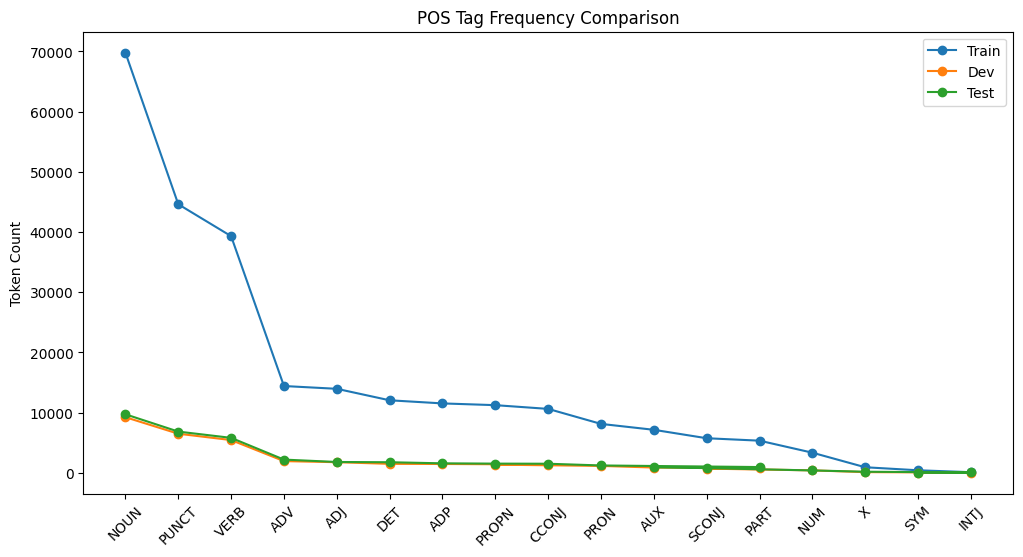

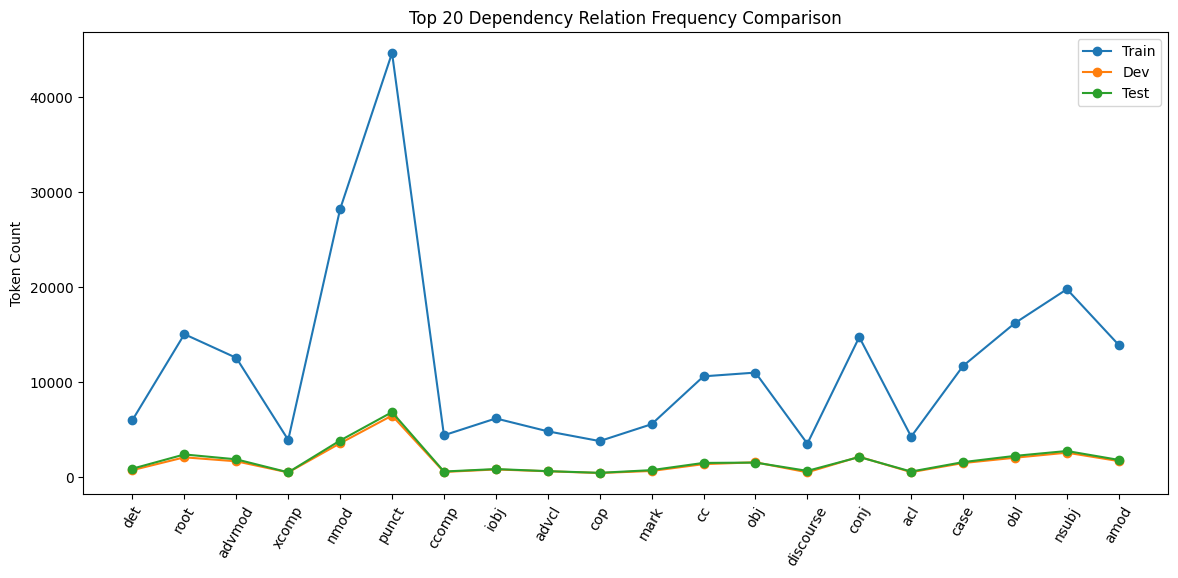

In [6]:
from conllu import parse_incr
from collections import Counter
import matplotlib.pyplot as plt

def analyze_conllu(file_path, dataset_name="Dataset"):
    pos_counter = Counter()
    rel_counter = Counter()

    with open(file_path, "r", encoding="utf-8") as f:
        for tokenlist in parse_incr(f):
            for token in tokenlist:
                pos_counter[token["upos"]] += 1
                rel_counter[token["deprel"]] += 1

    # 输出 POS
    print(f"=== {dataset_name} POS Frequency ===")
    for pos, count in pos_counter.most_common():
        print(f"{pos:6} : {count:5}")

    # 输出 Dependency
    print(f"\n=== {dataset_name} Dependency Relation Frequency ===")
    for rel, count in rel_counter.most_common():
        print(f"{rel:15} : {count:5}")

    return pos_counter, rel_counter

# 文件路径
datasets = {
    "Train": "./UD_Latvian_LVTB/lv_lvtb-ud-train.conllu",
    "Dev": "/home/jesse/Projects/myprojs/Master_Thesis/Fengdi_Huang_Master_Thesis_Repo/UD_Latvian_LVTB/lv_lvtb-ud-dev.conllu",
    "Test": "/home/jesse/Projects/myprojs/Master_Thesis/Fengdi_Huang_Master_Thesis_Repo/UD_Latvian_LVTB/lv_lvtb-ud-test.conllu"
}

# 保存计数器结果
pos_counters = {}
rel_counters = {}

for name, path in datasets.items():
    pos_counters[name], rel_counters[name] = analyze_conllu(path, dataset_name=name)

# 可视化 POS
plt.figure(figsize=(12,6))
for name, counter in pos_counters.items():
    labels, values = zip(*counter.most_common())
    plt.plot(labels, values, marker='o', label=name)
plt.title("POS Tag Frequency Comparison")
plt.ylabel("Token Count")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 可视化 Dependency Relation（前 20 高频）
plt.figure(figsize=(14,6))
top_rels_all = set()
for counter in rel_counters.values():
    top_rels_all.update([rel for rel, _ in counter.most_common(20)])
top_rels_all = list(top_rels_all)

for name, counter in rel_counters.items():
    values = [counter.get(rel, 0) for rel in top_rels_all]
    plt.plot(top_rels_all, values, marker='o', label=name)
plt.title("Top 20 Dependency Relation Frequency Comparison")
plt.ylabel("Token Count")
plt.xticks(rotation=60)
plt.legend()
plt.show()


In [1]:
# ======================================
# Cell 1：Convert conllu to spaCy format
# ======================================
!python -m spacy convert /home/jesse/Projects/myprojs/Master_Thesis/Fengdi_Huang_Master_Thesis_Repo/UD_Latvian_LVTB/lv_lvtb-ud-train.conllu ./Corpus/train -n 10 
!python -m spacy convert /home/jesse/Projects/myprojs/Master_Thesis/Fengdi_Huang_Master_Thesis_Repo/UD_Latvian_LVTB/lv_lvtb-ud-dev.conllu ./Corpus/train -n 10 
!python -m spacy convert /home/jesse/Projects/myprojs/Master_Thesis/Fengdi_Huang_Master_Thesis_Repo/UD_Latvian_LVTB/lv_lvtb-ud-test.conllu ./Corpus/train -n 10

# For testing
!python -m spacy convert /home/jesse/Projects/myprojs/Master_Thesis/Fengdi_Huang_Master_Thesis_Repo/UD_Latvian_LVTB/lv_lvtb-ud-test.conllu ./Corpus/test
"""
Using a lookup table for lemmatization matches words solely based on their surface form (or lowercase),
without considering context. In longer documents (multiple sentences or complex structures):

    - spaCy's lemmatization may be indirectly affected by pipeline processing and Vocab caching. 
      For example, repeated tokens or subtle variations in capitalization/punctuation can lead 
      to lookup misses.
    - Some compound or modified words might not exist in the lookup table.

As a result, longer documents increase the likelihood of lookup failures, reducing overall lemma accuracy.

To balance this, during training we group 10 sentences per Doc to provide richer context for
sentence segmentation learning. For evaluating lemma performance, however, we use a test set
with one sentence per Doc, which isolates lemma accuracy from potential inter-sentence effects.
"""



print("All conllu files are converted to spaCy Format.")


ℹ Grouping every 10 sentences into a document.
✔ Generated output file (1506 documents):
Corpus/train/lv_lvtb-ud-train.spacy
ℹ Grouping every 10 sentences into a document.
✔ Generated output file (211 documents):
Corpus/train/lv_lvtb-ud-dev.spacy
ℹ Grouping every 10 sentences into a document.
✔ Generated output file (242 documents):
Corpus/train/lv_lvtb-ud-test.spacy
ℹ Grouping every 1 sentences into a document.
⚠ To generate better training data, you may want to group sentences
into documents with `-n 10`.
✔ Generated output file (2412 documents):
Corpus/test/lv_lvtb-ud-test.spacy
All conllu files are converted to spaCy Format.


In [2]:
# ===============================================
# Cell 2: Split training data (e.g., 50%, 20%, 5%, 1%)
# ===============================================
import spacy
from spacy.tokens import DocBin
from pathlib import Path

# corpus dir
corpus_train_path = Path("/home/jesse/Projects/myprojs/Master_Thesis/Fengdi_Huang_Master_Thesis_Repo/Corpus/train")

# Dir
train_path = corpus_train_path / "lv_lvtb-ud-train.spacy"

train_100_path = corpus_train_path / "lv_lvtb-ud-train-100pct.spacy"
train_50_path = corpus_train_path / "lv_lvtb-ud-train-50pct.spacy"
train_20_path = corpus_train_path / "lv_lvtb-ud-train-20pct.spacy"
train_5_path = corpus_train_path / "lv_lvtb-ud-train-5pct.spacy"
train_1_path = corpus_train_path / "lv_lvtb-ud-train-1pct.spacy"

# Load corpora
nlp_blank = spacy.blank("lv") 
docbin = DocBin().from_disk(train_path)
docs = list(docbin.get_docs(nlp_blank.vocab))

# keep 100%
docs_100pct = docs

#save .spacy file
docbin_100 = DocBin(docs=docs_100pct)
docbin_100.to_disk(train_100_path)

# keep top 50%
half_len = len(docs) // 2
docs_50pct = docs[:half_len]

# save .spacy file
docbin_50 = DocBin(docs=docs_50pct)
docbin_50.to_disk(train_50_path)

# keep top 20%
fifth_len = len(docs) // 5
docs_20pct = docs[:fifth_len]

# save .spacy file
docbin_20 = DocBin(docs=docs_20pct)
docbin_20.to_disk(train_20_path)

# keep top 5%
fifth_len = len(docs) // 20
docs_5pct = docs[:fifth_len]

# save .spacy file
docbin_5 = DocBin(docs=docs_5pct)
docbin_5.to_disk(train_5_path)

# keep top 1%
hundredth = len(docs) // 100
docs_1pct = docs[:hundredth]

# save .spacy file
docbin_1 = DocBin(docs=docs_1pct)
docbin_1.to_disk(train_1_path)

print(f"✅ Saved first 50% of training data to: {train_50_path}")
print(f"Original samples: {len(docs)} | New subset: {len(docs_50pct)}")

print(f"✅ Saved first 20% of training data to: {train_20_path}")
print(f"Original samples: {len(docs)} | New subset: {len(docs_20pct)}")

print(f"✅ Saved first 5% of training data to: {train_5_path}")
print(f"Original samples: {len(docs)} | New subset: {len(docs_5pct)}")

print(f"✅ Saved first 1% of training data to: {train_1_path}")
print(f"Original samples: {len(docs)} | New subset: {len(docs_1pct)}")



/home/jesse/Projects/myenvs/master_thesis/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ Saved first 50% of training data to: /home/jesse/Projects/myprojs/Master_Thesis/Fengdi_Huang_Master_Thesis_Repo/Corpus/train/lv_lvtb-ud-train-50pct.spacy
Original samples: 1506 | New subset: 753
✅ Saved first 20% of training data to: /home/jesse/Projects/myprojs/Master_Thesis/Fengdi_Huang_Master_Thesis_Repo/Corpus/train/lv_lvtb-ud-train-20pct.spacy
Original samples: 1506 | New subset: 301
✅ Saved first 5% of training data to: /home/jesse/Projects/myprojs/Master_Thesis/Fengdi_Huang_Master_Thesis_Repo/Corpus/train/lv_lvtb-ud-train-5pct.spacy
Original samples: 1506 | New subset: 75
✅ Saved first 1% of training data to: /home/jesse/Projects/myprojs/Master_Thesis/Fengdi_Huang_Master_Thesis_Repo/Corpus/train/lv_lvtb-ud-train-1pct.spacy
Original samples: 1506 | New subset: 15
